In [12]:
import numpy as np
import pandas as pd

In [13]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [14]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1545,ham,"Good afternoon, my love ! Any job prospects ? ...",NaN,NaN,NaN
3824,ham,Hi. I'm always online on yahoo and would like ...,NaN,NaN,NaN
246,ham,I asked you to call him now ok,NaN,NaN,NaN
2069,spam,"Eerie Nokia tones 4u, rply TONE TITLE to 8007 ...",NaN,NaN,NaN
2249,spam,"Thanks for your ringtone order, ref number R83...",NaN,NaN,NaN


In [15]:
df.shape

(5572, 5)

In [16]:
# 1. Data Cleaning
# 2. EDA (Exploratory data analysis)
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1. Data Cleaning

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [18]:
# Since last 3 columns dont have much values therefore, we will drop them
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [19]:
df.sample(5)

,v1,v2
2291,ham,Remind me how to get there and I shall do so
4988,ham,So your telling me I coulda been your real Val...
1698,spam,"Free msg. Sorry, a service you ordered from 81..."
3642,ham,"Sorry, left phone upstairs. OK, might be hecti..."
3827,ham,Where are you ? What are you doing ? Are yuou ...


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [21]:
# Renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(10)

,target,text
3579,ham,Have a lovely night and when you wake up to se...
1048,ham,I walked an hour 2 c u! doesnåÕt that show I c...
3915,ham,Ok. C u then.
1156,ham,Hey.. Something came up last min.. Think i wun...
1153,spam,1000's of girls many local 2 u who r virgins 2...
2938,ham,Are you ok. What happen to behave like this
3388,ham,O. Guess they both got screwd
469,ham,There are many company. Tell me the language.
4575,spam,Congratulations ur awarded 500 of CD vouchers ...
3455,ham,Ok. I.ll do you right later.


In [22]:
# Using label encoder to change ham and spam to values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [23]:
df['target'] = encoder.fit_transform(df['target'])

In [24]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
# Checking for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [26]:
# Checking for duplicate values
df.duplicated().sum()

403

In [27]:
# Remove duplicates
df = df.drop_duplicates(keep='first')

In [28]:
df.shape

(5169, 2)

# 2. EDA

In [29]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

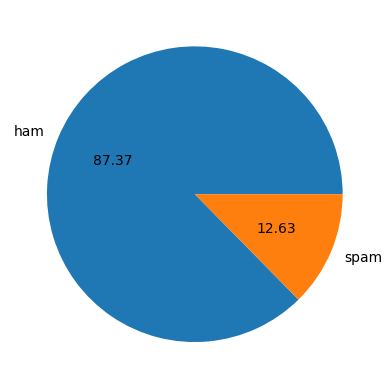

In [30]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [31]:
# Therefore, data is imbalanced
import nltk  # natural language toolkit
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
df['num_characters'] = df['text'].apply(len) # no. of characters used

In [33]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [34]:
# find number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [35]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [36]:
# number of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [37]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences
3935,0,They r giving a second chance to rahul dengra.,46,10,1
4216,0,Will be office around 4 pm. Now i am going hos...,52,13,2
664,0,Yes baby! We can study all the positions of th...,61,15,2
2069,1,"Eerie Nokia tones 4u, rply TONE TITLE to 8007 ...",162,29,1
4848,0,either way works for me. I am &lt;#&gt; year...,81,24,3


In [38]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
# Ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [40]:
# Spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [41]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

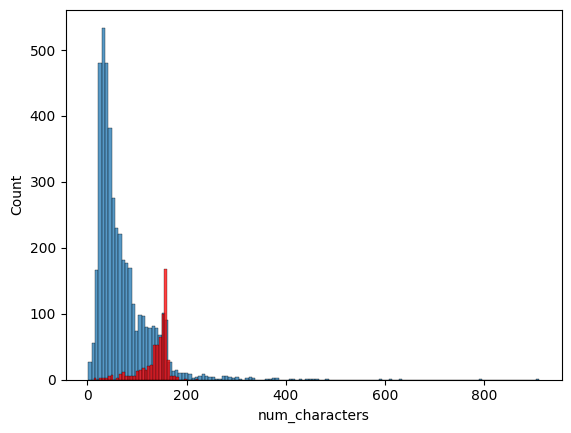

In [42]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

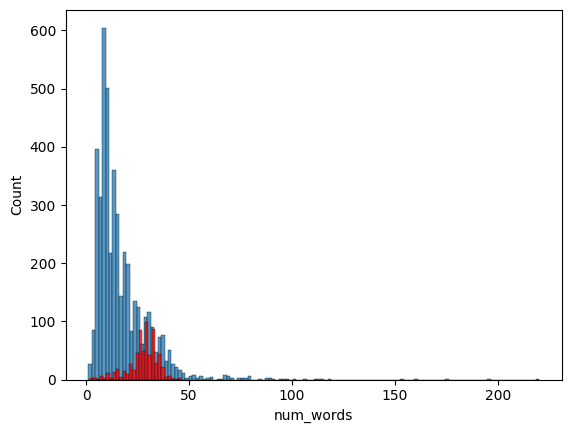

In [43]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

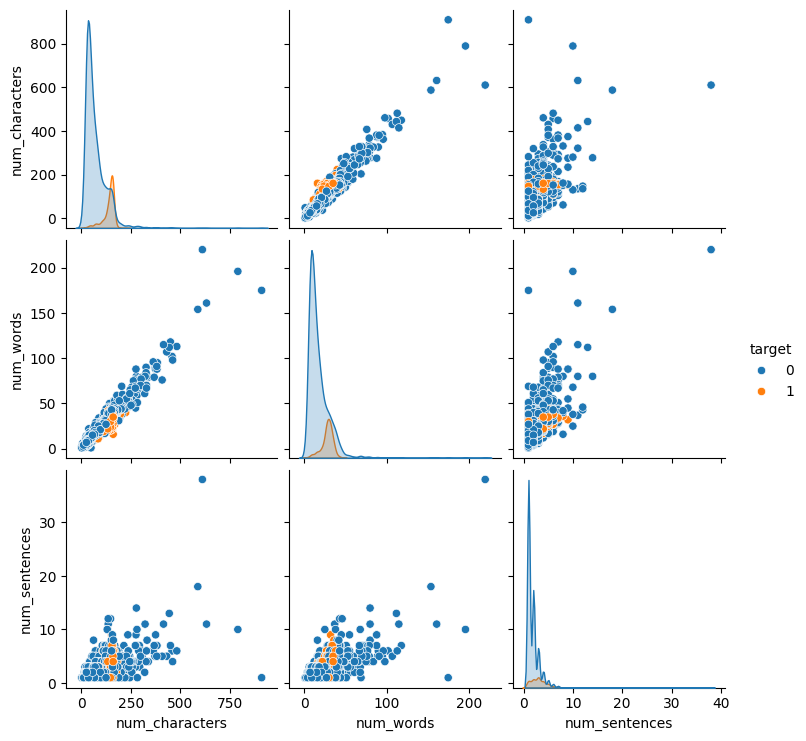

In [44]:
sns.pairplot(df,hue='target')

In [45]:
df.sample(10)

,target,text,num_characters,num_words,num_sentences
3923,0,How? Izzit still raining?,25,6,2
829,0,Thanks for yesterday sir. You have been wonder...,89,17,4
2675,0,I'm sick !! I'm needy !! I want you !! *pouts*...,136,46,12
4512,1,Money i have won wining number 946 wot do i do...,51,12,1
2965,0,"Are you being good, baby? :)",28,9,2
1068,1,Someone U know has asked our dating service 2 ...,134,28,4
3814,0,"Not yet chikku..k, then wat abt tht guy did he...",82,20,1
1862,0,The last thing i ever wanted to do was hurt yo...,790,196,10
1413,1,Dear U've been invited to XCHAT. This is our f...,143,25,3
1670,0,Lmao!nice 1,11,4,1


In [46]:
numeric_df = df[['num_characters', 'num_words', 'num_sentences', 'target']]

In [47]:
numeric_df.corr()

,num_characters,num_words,num_sentences,target
num_characters,1.000000,0.965760,0.624139,0.384717
num_words,0.965760,1.000000,0.679971,0.262912
num_sentences,0.624139,0.679971,1.000000,0.263939
target,0.384717,0.262912,0.263939,1.000000


<Axes: >

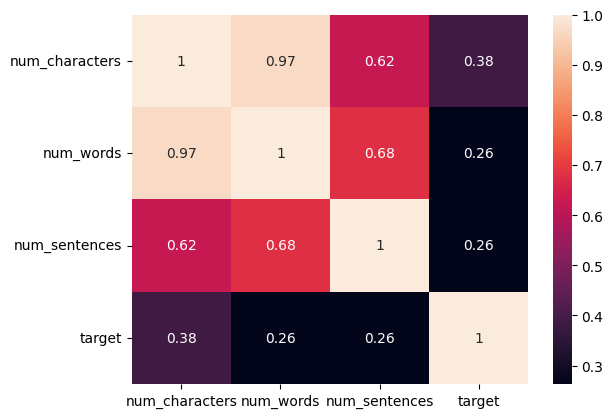

In [48]:
sns.heatmap(numeric_df.corr(), annot=True)

We need to keep only one column out of the 3 columns so we keep only num_characters since it has the highest correlation with the target. That is, having higher num_characters means more chances of it being a spam.

# 3. Data Preprocessing
Lower case<br>
Tokenization - break into words<br>
Removing special characters<br>
Removing stop words and punctuation - stop words = no meaning words (is, an, the)<br>
Stemming - if words originate from same root word convert it to same word

In [49]:
# Converting to lowercase
t = 'KHUSHI IS A FOOL. HELLo everyone @# 123'
t = t.lower()

In [50]:
# Tokenization
t = nltk.word_tokenize(t)

In [51]:
# Removing special characters
y = []
for i in t:
    if i.isalnum():
        y.append(i)
print(y)

['khushi', 'is', 'a', 'fool', 'hello', 'everyone', '123']


In [52]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
# Stop words
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [54]:
# Special characters
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [55]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [56]:
# Creating a function to perform all these steps
def transform_text(text):
    # Lower case
    text = text.lower()
    # Tokenization
    text = nltk.word_tokenize(text)
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    # Removing stopwords and punctuation
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    # Stemming
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [57]:
transform_text("My name is Khushi")

'name khushi'

In [58]:
df['transformed_text'] = df['text'].apply(transform_text)

In [59]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [60]:
# Word cloud of spam and ham - showing it bigger
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [61]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

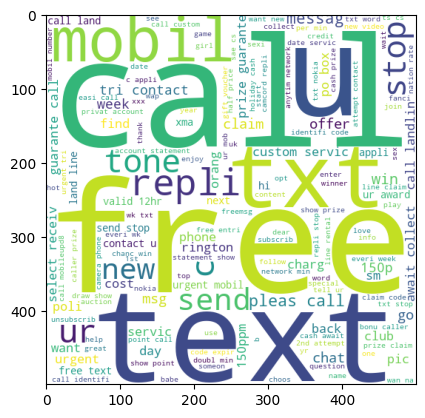

In [62]:
plt.imshow(spam_wc)

In [63]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))


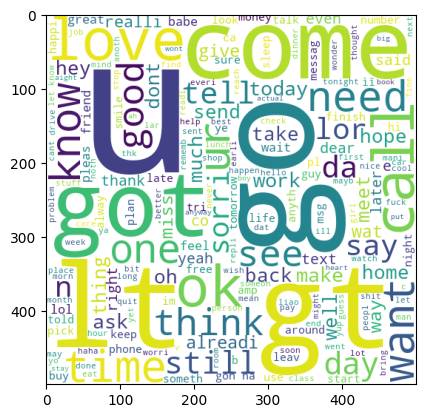

In [64]:
plt.imshow(ham_wc)

In [65]:
# Top 30 words of spam and ham
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [66]:
len(spam_corpus) #Number of spam words

9939

In [67]:
from collections import Counter

In [68]:
mc = pd.DataFrame(Counter(spam_corpus).most_common(30))

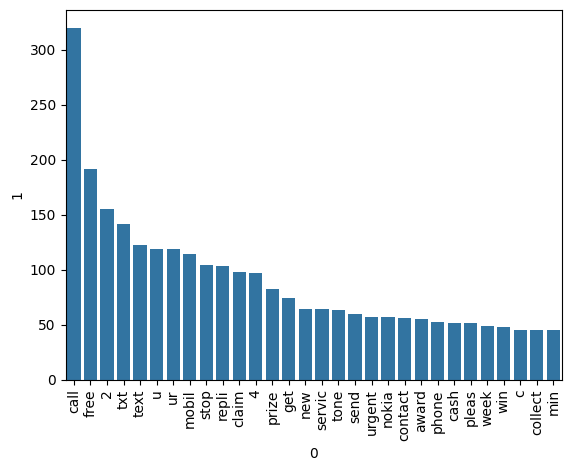

In [69]:
sns.barplot(x = mc[0], y = mc[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [70]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [71]:
len(ham_corpus)

35404

In [72]:
mc_h = pd.DataFrame(Counter(ham_corpus).most_common(30))

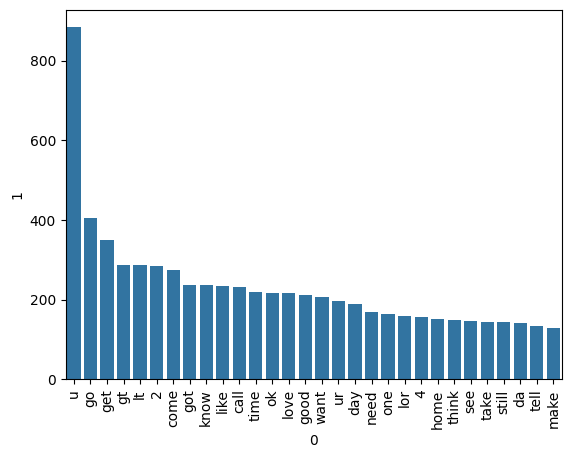

In [73]:
sns.barplot(x = mc_h[0], y = mc_h[1])
plt.xticks(rotation = 'vertical')
plt.show()

# 4. Model Building

In [74]:
# Naive Bayes
# Text vectorization
# Methods to do this:
# 1. Using Bag of Words
# 2. 
# 3. 

In [75]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [76]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [77]:
# Convert a collection of text documents to a matrix of token counts.
X = cv.fit_transform(df['transformed_text']).toarray()

In [78]:
X.shape

(5169, 6708)

In [79]:
y = df['target'].values

In [80]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2)

In [83]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [84]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [85]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8723897911832946
[[991 139]
 [ 26 137]]
0.4963768115942029


In [86]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9659706109822119
[[1102   28]
 [  16  147]]
0.84


In [87]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9698375870069605
[[1127    3]
 [  36  127]]
0.9769230769230769


In [ ]:
# Vectorizing the sentences

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()

In [89]:
X = tfid.fit_transform(df['transformed_text']).toarray()

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2)

In [91]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8700696055684455
[[992 138]
 [ 30 133]]
0.4907749077490775


In [92]:
# Precision score matters more here than accuracy since there is a data imbalance
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9597834493426141
[[1130    0]
 [  52  111]]
1.0


In [93]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9698375870069605
[[1127    3]
 [  36  127]]
0.9769230769230769


In [94]:
# Selected: tfidf -> mnb

In [95]:
# Applying many models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [96]:
svc = SVC(kernel = 'sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators=50, random_state = 2)

In [97]:
clfs = {
    'SVC': svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [98]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [99]:
train_classifier(svc, X_train,y_train,X_test,y_test)

(0.9729311678267595, 0.9776119402985075)

In [102]:
accuracy_scores = []
precision_scores = []
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test )
    print('For', name)
    print("Accuracy: ",current_accuracy)
    print("Precision: ",current_precision)

    precision_scores.append(current_precision)
    accuracy_scores.append(current_accuracy)
    

For SVC
Accuracy:  0.9729311678267595
Precision:  0.9776119402985075
For KN
Accuracy:  0.9033255993812839
Precision:  1.0
For NB
Accuracy:  0.9597834493426141
Precision:  1.0
For DT
Accuracy:  0.934261407579273
Precision:  0.825
For LR
Accuracy:  0.9520494972931168
Precision:  0.9391304347826087
For RF
Accuracy:  0.9737045630317092
Precision:  0.9923664122137404


d:\Python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy:  0.9613302397525135
Precision:  0.9312977099236641
For BgC
Accuracy:  0.9605568445475638
Precision:  0.868421052631579
For ETC
Accuracy:  0.9791183294663574
Precision:  0.9927536231884058
For GBDT
Accuracy:  0.951276102088167
Precision:  0.890625
For xgb
Accuracy:  0.9698375870069605
Precision:  0.9428571428571428


In [103]:
performance_df = pd.DataFrame({'Algorithms' : clfs.keys(), 'Accuracy':accuracy_scores,'Precision':precision_scores})

In [110]:
performance_df.sort_values('Precision',ascending=False)

,Algorithms,Accuracy,Precision
1,KN,0.903326,1.000000
2,NB,0.959783,1.000000
8,ETC,0.979118,0.992754
5,RF,0.973705,0.992366
0,SVC,0.972931,0.977612
10,xgb,0.969838,0.942857
4,LR,0.952049,0.939130
6,AdaBoost,0.961330,0.931298
9,GBDT,0.951276,0.890625
7,BgC,0.960557,0.868421


In [ ]:
# Most accuracy for extra trees and also good precision
# ETC = Extra trees = more random than random forest
# Precision is good for naive Bayes and accuracy is not too bad but overall extra trees and random forest is the best

In [ ]:
# Improving the model performance
# 1. Change the max_features parameter of TfIdf = number of words vectorized
# Choosing a max number of most used words

In [119]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000) # Choose a number based on hit and trial method

In [120]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2)

In [122]:
accuracy_max_ft_3000 = []
precision_max_ft_3000 = []
for name, clf in clfs.items():
    current_accuracy_max_ft_3000, current_precision_max_ft_3000 = train_classifier(clf, X_train, y_train, X_test, y_test)
    print('For', name)
    print("Accuracy: ",current_accuracy_max_ft_3000)
    print("Precision: ",current_precision_max_ft_3000)

    precision_max_ft_3000.append(current_precision_max_ft_3000)
    accuracy_max_ft_3000.append(current_accuracy_max_ft_3000)

For SVC
Accuracy:  0.9737045630317092
Precision:  0.9777777777777777
For KN
Accuracy:  0.9095127610208816
Precision:  1.0
For NB
Accuracy:  0.9729311678267595
Precision:  1.0
For DT
Accuracy:  0.9280742459396751
Precision:  0.7966101694915254
For LR
Accuracy:  0.9574632637277649
Precision:  0.9655172413793104
For RF
Accuracy:  0.9767981438515081
Precision:  0.9925925925925926


d:\Python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy:  0.9636504253673627
Precision:  0.9264705882352942
For BgC
Accuracy:  0.9590100541376644
Precision:  0.8666666666666667
For ETC
Accuracy:  0.979891724671307
Precision:  0.9659863945578231
For GBDT
Accuracy:  0.9528228924980665
Precision:  0.9396551724137931
For xgb
Accuracy:  0.9667440061871616
Precision:  0.9477611940298507


In [123]:
performance_df['Accuracy_max_ft_3000'] = accuracy_max_ft_3000
performance_df['Precision_max_ft_3000'] = precision_max_ft_3000

C:\Users\HP\AppData\Local\Temp\ipykernel_18196\500454074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance_df['Accuracy_max_ft_3000'] = accuracy_max_ft_3000


In [124]:
performance_df

,Algorithms,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.972931,0.977612,0.973705,0.977778
1,KN,0.903326,1.000000,0.909513,1.000000
2,NB,0.959783,1.000000,0.972931,1.000000
3,DT,0.934261,0.825000,0.928074,0.796610
4,LR,0.952049,0.939130,0.957463,0.965517
5,RF,0.973705,0.992366,0.976798,0.992593
6,AdaBoost,0.961330,0.931298,0.963650,0.926471
7,BgC,0.960557,0.868421,0.959010,0.866667
8,ETC,0.979118,0.992754,0.979892,0.965986
9,GBDT,0.951276,0.890625,0.952823,0.939655


In [ ]:
# This increased NB's accuracy while being high precision. This removed the NB's disadvantage over ETC and RF.

In [125]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Now we are scaling our X from 0 to 1 using MinMaxScaler not StandardScaler since it gives negative values also which is not accepted by Naive Bayes

In [126]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2)
accuracy_scaling = []
precision_scaling = []
for name, clf in clfs.items():
    current_accuracy_scaling, current_precision_scaling = train_classifier(clf, X_train, y_train, X_test, y_test)
    print('For', name)
    print("Accuracy: ",current_accuracy_scaling)
    print("Precision: ",current_precision_scaling)

    precision_scaling.append(current_precision_scaling)
    accuracy_scaling.append(current_accuracy_scaling)

For SVC
Accuracy:  0.9721577726218097
Precision:  0.9440559440559441
For KN
Accuracy:  0.9079659706109822
Precision:  0.9782608695652174
For NB
Accuracy:  0.9806651198762568
Precision:  0.9539473684210527
For DT
Accuracy:  0.9280742459396751
Precision:  0.7966101694915254
For LR
Accuracy:  0.9675174013921114
Precision:  0.9548872180451128
For RF
Accuracy:  0.9767981438515081
Precision:  0.9925925925925926


d:\Python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy:  0.9636504253673627
Precision:  0.9264705882352942
For BgC
Accuracy:  0.9590100541376644
Precision:  0.8666666666666667
For ETC
Accuracy:  0.979891724671307
Precision:  0.9659863945578231
For GBDT
Accuracy:  0.9528228924980665
Precision:  0.9396551724137931
For xgb
Accuracy:  0.9667440061871616
Precision:  0.9477611940298507


In [130]:
performance_df['Accuracy_scaling'] = accuracy_scaling
performance_df['Precision_scaling'] = precision_scaling
performance_df

,Algorithms,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,SVC,0.972931,0.977612,0.973705,0.977778,0.972158,0.944056
1,KN,0.903326,1.000000,0.909513,1.000000,0.907966,0.978261
2,NB,0.959783,1.000000,0.972931,1.000000,0.980665,0.953947
3,DT,0.934261,0.825000,0.928074,0.796610,0.928074,0.796610
4,LR,0.952049,0.939130,0.957463,0.965517,0.967517,0.954887
5,RF,0.973705,0.992366,0.976798,0.992593,0.976798,0.992593
6,AdaBoost,0.961330,0.931298,0.963650,0.926471,0.963650,0.926471
7,BgC,0.960557,0.868421,0.959010,0.866667,0.959010,0.866667
8,ETC,0.979118,0.992754,0.979892,0.965986,0.979892,0.965986
9,GBDT,0.951276,0.890625,0.952823,0.939655,0.952823,0.939655


In [ ]:
# This decreased the precision of Naive Bayes therfore, we will not include it here.

In [132]:
# We are trying to include another column from df i.e. num_characters
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
# appending the num_character col to X
# X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))
# But even after this the result is not good
# Best results are only after accuracy_max_ft_3000

In [ ]:
# We can try voting classifier = combination of multiple models = svc, mnb, etc
# Accuracy is 0.98
# Precision is 0.99
# But since precision is really important therefore we are not considering this model

In [ ]:
# We can also try doing stacking where we decide the weightage of the models using a 'final estimator' which can be kept as Random Forest.
# But we dont get any good results

In [ ]:
# Since we couldnt find any better model we will choose multinomial naive bayes model. But we can still try other combinations to find a better model.

Choosing MNB model

In [135]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2)
# Precision score matters more here than accuracy since there is a data imbalance
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9729311678267595
[[1130    0]
 [  35  128]]
1.0


# Pipeline

In [134]:
# Whenever we have a new email we have to perform:
# 1. Text transformation
# 2. Vectorize
# 3. Applying algorithm

In [136]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))